In [84]:
%load_ext autoreload
%autoreload 2

from pdac_utils import *
import receptor_ligand as rl
import numpy as np
import pandas as pd
import pegasus as pg
import scanpy as sc
import scplot as scp

from anndata import AnnData
from glob import glob
from matplotlib import pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
genemarkers = load_genemarkers()
pid_versions = get_pid_version_map()
broad_celltypes = get_broad_celltypes()

In [3]:
combinenaivedata = sc.read("data/combinenaivedata-reprocessed-final.h5ad")
combinetreateddata = sc.read("data/combinetreateddata-reprocessed-final.h5ad")

In [4]:
translation = { 
  'Regenerating_Acinar':'Acinar',
  'CD4pos_T':'CD4',
  'CD4pos_Tregs':'CD4',
  'CD8pos_T':'CD8',
  'DC_activated':'DC',
  'cDC1':'DC',
  'cDC2':'DC',
  'pDC':'DC',
  'Alpha':'Endocrine',
  'Beta':'Endocrine',
  'Delta':'Endocrine',
  'Gamma':'Endocrine'}

translation2 = { 'Regenerating_Acinar':'Acinar',
  'cDC1':'DC',
  'Alpha':'Endocrine',
  'Beta':'Endocrine',
  'CD4pos_T':'T',
  'CD4pos_Tregs':'T',
  'CD8pos_T':'T',
  'DC_activated':'DC',
  'Delta':'Endocrine',
  'Gamma':'Endocrine',
  'Macrophages_Monocytes':'Myeloid',
  'Mast':'Myeloid',
  'Plasma':'B',
  'cDC1':'DC',
  'cDC2':'DC',
  'pDC':'DC'}

In [5]:
combinenaivedata.obs['comparison_cell_subsets'] = [translation2.get(celltype, celltype) for celltype in combinenaivedata.obs['detailed_cell_subsets']]
combinetreateddata.obs['comparison_cell_subsets'] = [translation2.get(celltype, celltype) for celltype in combinetreateddata.obs['detailed_cell_subsets']]

... storing 'comparison_cell_subsets' as categorical


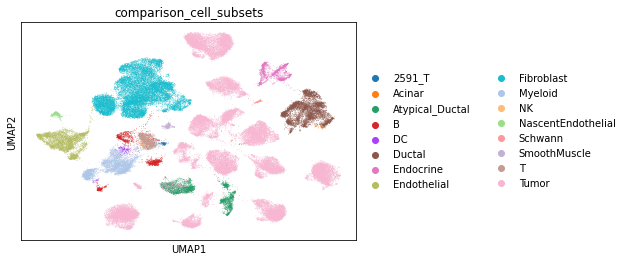

... storing 'comparison_cell_subsets' as categorical


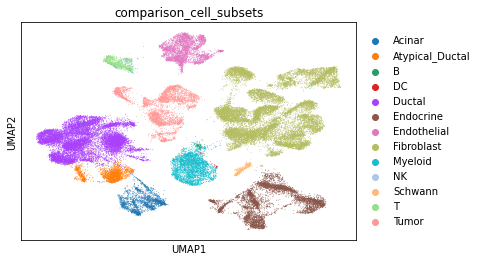

In [6]:
sc.pl.umap(combinenaivedata, color='comparison_cell_subsets')
sc.pl.umap(combinetreateddata, color='comparison_cell_subsets')

In [7]:
rl_df = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/PairsLigRec.clean.txt', sep="\t")

In [8]:
ix = rl.execute(combinenaivedata, "comparison_cell_subsets", rl_df)

2482 pairs found
2020-07-31 17:32:30,646 - pegasus - INFO - calc_basic_stat finished for cluster 2591_T.
2020-07-31 17:32:30,651 - pegasus - INFO - calc_basic_stat finished for cluster Acinar.
2020-07-31 17:32:30,659 - pegasus - INFO - calc_basic_stat finished for cluster Atypical_Ductal.
2020-07-31 17:32:30,663 - pegasus - INFO - calc_basic_stat finished for cluster B.
2020-07-31 17:32:30,667 - pegasus - INFO - calc_basic_stat finished for cluster DC.
2020-07-31 17:32:30,675 - pegasus - INFO - calc_basic_stat finished for cluster Ductal.
2020-07-31 17:32:30,680 - pegasus - INFO - calc_basic_stat finished for cluster Endocrine.
2020-07-31 17:32:30,686 - pegasus - INFO - calc_basic_stat finished for cluster Endothelial.
2020-07-31 17:32:30,703 - pegasus - INFO - calc_basic_stat finished for cluster Fibroblast.
2020-07-31 17:32:30,710 - pegasus - INFO - calc_basic_stat finished for cluster Myeloid.
2020-07-31 17:32:30,714 - pegasus - INFO - calc_basic_stat finished for cluster NK.
2020-0

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/scipy/stats/stats.py:6895: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))


In [9]:
ix.to_csv("/ahg/regevdata/projects/Pancreas/src/data/naive_broad_ligand_receptor.txt")

In [10]:
ix = rl.execute(combinetreateddata, "comparison_cell_subsets", rl_df)

2482 pairs found
2020-07-31 17:33:31,830 - pegasus - INFO - calc_basic_stat finished for cluster Acinar.
2020-07-31 17:33:31,837 - pegasus - INFO - calc_basic_stat finished for cluster Atypical_Ductal.
2020-07-31 17:33:31,840 - pegasus - INFO - calc_basic_stat finished for cluster B.
2020-07-31 17:33:31,844 - pegasus - INFO - calc_basic_stat finished for cluster DC.
2020-07-31 17:33:31,854 - pegasus - INFO - calc_basic_stat finished for cluster Ductal.
2020-07-31 17:33:31,860 - pegasus - INFO - calc_basic_stat finished for cluster Endocrine.
2020-07-31 17:33:31,865 - pegasus - INFO - calc_basic_stat finished for cluster Endothelial.
2020-07-31 17:33:31,877 - pegasus - INFO - calc_basic_stat finished for cluster Fibroblast.
2020-07-31 17:33:31,882 - pegasus - INFO - calc_basic_stat finished for cluster Myeloid.
2020-07-31 17:33:31,885 - pegasus - INFO - calc_basic_stat finished for cluster NK.
2020-07-31 17:33:31,889 - pegasus - INFO - calc_basic_stat finished for cluster Schwann.
2020-

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/scipy/stats/stats.py:6895: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))


In [11]:
ix.to_csv("/ahg/regevdata/projects/Pancreas/src/data/treated_broad_ligand_receptor.txt")

In [94]:
ix

,ligand,receptor,ligand_group,receptor_group,p,ligand_percent,receptor_percent,ligand_p,receptor_p,ligand_percent_other,...,ligand_mean,ligand_other_mean,receptor_mean,receptor_other_mean,fold_change_score,ligand_t,receptor_t,ligand_fc,receptor_fc,fdr
0,A2M,LRP1,Fibroblast,Fibroblast,0.000000e+00,17.399878,31.725201,0.000000e+00,0.000000e+00,7.472438,...,0.338160,0.126074,0.630165,0.174894,2.812855,31.0,54.0,1.236255,1.576601,0.000000e+00
1,ACE,AGTR2,Fibroblast,Fibroblast,5.068871e-27,0.147874,0.043130,1.225825e-27,6.290758e-02,0.971242,...,0.002069,0.011024,0.000427,0.000081,1.991431,-10.0,1.0,0.991086,1.000345,8.380190e-27
2,ACE,BDKRB2,Fibroblast,Fibroblast,7.718558e-26,0.147874,0.000000,1.225825e-27,1.000000e+00,0.971242,...,0.002069,0.011024,0.000000,0.000000,1.991086,-10.0,0.0,0.991086,1.000000,1.258581e-25
3,ADAM10,AXL,Fibroblast,Fibroblast,0.000000e+00,22.563154,32.858902,0.000000e+00,0.000000e+00,46.631279,...,0.408922,0.804627,0.661472,0.137184,2.362460,-48.0,61.0,0.673205,1.689255,0.000000e+00
4,ADAM10,EPHA3,Fibroblast,Fibroblast,0.000000e+00,22.563154,22.224276,0.000000e+00,0.000000e+00,46.631279,...,0.408922,0.804627,0.498689,0.053838,2.233463,-48.0,55.0,0.673205,1.560258,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,TG,ASGR1,NK,Acinar,3.347430e-28,17.567568,0.149925,1.461144e-03,3.344918e-27,3.382102,...,0.345823,0.052050,0.001200,0.012338,2.330402,3.0,-10.0,1.341478,0.988924,5.617021e-28
154,TG,LRP2,NK,Acinar,6.618963e-03,17.567568,0.399800,1.461144e-03,5.584962e-01,3.382102,...,0.345823,0.052050,0.004883,0.003814,2.342547,3.0,0.0,1.341478,1.001069,7.262217e-03
155,TNFSF8,TNFRSF8,NK,Acinar,7.600943e-04,4.054054,0.249875,2.256669e-01,3.196572e-04,1.629594,...,0.094160,0.028622,0.002875,0.008483,2.062140,1.0,-3.0,1.067733,0.994407,8.592770e-04
156,UTS2B,UTS2R,NK,Acinar,5.936418e-01,2.702703,0.000000,2.478916e-01,1.000000e+00,0.555093,...,0.040202,0.007025,0.000000,0.000000,2.033733,1.0,0.0,1.033733,1.000000,5.950337e-01


In [105]:
ix[(ix.ligand_group != ix.receptor_group) & (ix.fdr < 0.001) & (ix.ligand_percent > 10)&(ix.receptor_percent > 10)&(ix.ligand_fc > 1.5) & (ix.receptor_fc > 1.5)].shape, treatedix.shape

((567, 21), (567, 22))

In [115]:
naiveix = pd.read_csv("/ahg/regevdata/projects/Pancreas/src/data/naive_broad_ligand_receptor.clean.txt")
treatedix = pd.read_csv("/ahg/regevdata/projects/Pancreas/src/data/treated_broad_ligand_receptor.clean.txt")

In [ ]:
df1 = get_stats(adata=combinenaivedata, ligand_indices=ligand_indices, receptor_indices=receptor_indices,
                ligand_group=a, receptor_group=b, ligand_fc=fc_a, receptor_fc=fc_b, ligand_p=p_a,
                receptor_p=p_b, ligand_percent=percent_a, ligand_percent_other=percent_a_other,
                receptor_percent=percent_b, receptor_percent_other=percent_b_other, ligand_t=t_a,
                receptor_t=t_b, ligand_mean=mean_a, receptor_mean=mean_b, ligand_other_mean=mean_other_a,
                receptor_other_mean=mean_other_b, autocrine=False)

In [125]:
def compute_strength(ix_df):
    ix_df['strength'] = [1]*ix_df.shape[0]
    summ_df = ix_df.groupby(['receptor_group', 'ligand_group']).agg('count').reset_index()
    return summ_df[['receptor_group','ligand_group','strength']].set_index(['receptor_group','ligand_group'])

In [126]:
df = compute_strength(naiveix[['ligand', 'ligand_group', 'receptor', 'receptor_group']])

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
pg.de_analysis(combinenaivedata, 'comparison_cell_subsets', auc=False)

2020-07-31 18:08:53,012 - pegasus - INFO - calc_basic_stat finished for cluster 2591_T.
2020-07-31 18:08:53,020 - pegasus - INFO - calc_basic_stat finished for cluster Acinar.
2020-07-31 18:08:53,090 - pegasus - INFO - calc_basic_stat finished for cluster Atypical_Ductal.
2020-07-31 18:08:53,114 - pegasus - INFO - calc_basic_stat finished for cluster B.
2020-07-31 18:08:53,123 - pegasus - INFO - calc_basic_stat finished for cluster DC.
2020-07-31 18:08:53,287 - pegasus - INFO - calc_basic_stat finished for cluster Ductal.
2020-07-31 18:08:53,318 - pegasus - INFO - calc_basic_stat finished for cluster Endocrine.
2020-07-31 18:08:53,378 - pegasus - INFO - calc_basic_stat finished for cluster Endothelial.
2020-07-31 18:08:53,879 - pegasus - INFO - calc_basic_stat finished for cluster Fibroblast.
2020-07-31 18:08:53,962 - pegasus - INFO - calc_basic_stat finished for cluster Myeloid.
2020-07-31 18:08:53,969 - pegasus - INFO - calc_basic_stat finished for cluster NK.
2020-07-31 18:08:53,980

In [34]:
de_results = combinenaivedata.varm['de_res']

In [67]:
uniques = set()
for i , x in tmp.iterrows():
    l, lg, r, rg = x.ligand, x.ligand_group, x.receptor, x.receptor_group
    uniques.add((l, lg, r, rg))

In [69]:
len(uniques), tmp.shape

(414, (418, 5))

In [111]:
def filter_basedon_expression(adata, tmp):
    cell_combos = tmp[['ligand_group', 'receptor_group']].set_index(['ligand_group', 'receptor_group']).index.unique()
    dfs=[]
    ct = 0
    for ligand_group, receptor_group in cell_combos:
        tmpsubset = tmp[(tmp['ligand_group']==ligand_group) & (tmp['receptor_group']==receptor_group)]
        ligands = tmpsubset.ligand
        receptors = tmpsubset.receptor
        ligand_indices = combinenaivedata.var.index.get_indexer_for(ligands)
        receptor_indices = combinenaivedata.var.index.get_indexer_for(receptors)
        ct = ct + tmpsubset.shape[0]
        a = ligand_group
        fc_a = de_results['fold_change:{}'.format(a)]
        percent_a = de_results['percentage:{}'.format(a)]
        percent_a_other = de_results['percentage_other:{}'.format(a)]
        p_a = de_results['t_pval:{}'.format(a)]
        t_a = de_results['t_score:{}'.format(a)]
        mean_a = de_results['mean_logExpr:{}'.format(a)]
        mean_other_a = de_results['mean_logExpr_other:{}'.format(a)]

        b = receptor_group
        fc_b = de_results['fold_change:{}'.format(b)]
        percent_b = de_results['percentage:{}'.format(b)]
        percent_b_other = de_results['percentage_other:{}'.format(b)]
        p_b = de_results['t_pval:{}'.format(b)]
        t_b = de_results['t_score:{}'.format(b)]
        mean_b = de_results['mean_logExpr:{}'.format(b)]
        mean_other_b = de_results['mean_logExpr_other:{}'.format(b)]

        # look for ligands in a, receptors in b
        df1 = rl.get_stats(adata=adata,
            ligand_indices=ligand_indices,
            receptor_indices=receptor_indices,
            ligand_group=a,
            receptor_group=b,
            ligand_fc=fc_a,
            receptor_fc=fc_b,
            ligand_p=p_a,
            receptor_p=p_b,
            ligand_percent=percent_a,
            ligand_percent_other=percent_a_other,
            receptor_percent=percent_b,
            receptor_percent_other=percent_b_other,
            ligand_t=t_a,
            receptor_t=t_b,
            ligand_mean=mean_a,
            receptor_mean=mean_b,
            ligand_other_mean=mean_other_a,
            receptor_other_mean=mean_other_b,
            autocrine=False)
        dfs.append(df1)
    out = pd.concat(dfs)

    return out[(out.ligand_group != out.receptor_group) & (out.ligand_percent > 10)&(out.receptor_percent > 10)&(out.ligand_fc > 1.5) & (out.receptor_fc > 1.5)]

In [130]:
for i in range(100):
    tmp = naiveix.copy()
    tmp = tmp[['ligand', 'ligand_group', 'receptor', 'receptor_group']]
    tmp['ligand'] = tmp.ligand[np.random.permutation(len(tmp.ligand))].values
    tmp['receptor'] = tmp.receptor[np.random.permutation(len(tmp.receptor))].values
    filtertmp = filter_basedon_expression(combinenaivedata, tmp)
    shuffle_strength = compute_strength(filtertmp)
    df['shuffle_%d'%i] = shuffle_strength['strength']
display(df.fillna(0))

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/scipy/stats/stats.py:6895: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))


strength  shuffle_0  shuffle_1  shuffle_2  \
receptor_group ligand_group                                                 
2591_T         B                       2        0.0        0.0        0.0   
               Myeloid                 2        0.0        0.0        0.0   
               T                       2        0.0        0.0        0.0   
Acinar         Atypical_Ductal         3        0.0        0.0        0.0   
               Ductal                  3        0.0        0.0        0.0   
...                                  ...        ...        ...        ...   
Tumor          Endothelial             9        0.0        2.0        0.0   
               Fibroblast             32        6.0        6.0        2.0   
               NK                      1        0.0        0.0        0.0   
               Schwann                 7        0.0        0.0        0.0   
               T                       1        0.0        0.0        0.0   

                                shuffle_3  shuffle_4  shuffle_5  shuffle_6  \
receptor_group ligand_group                                                  
2591_T         B                      0.0        0.0        0.0        0.0   
               Myeloid                0.0        0.0        0.0        0.0   
               T                      0.0        0.0        0.0        0.0   
Acinar         Atypical_Ductal        0.0        0.0        0.0        0.0   
               Ductal                 0.0        0.0        0.0        0.0   
...                                   ...        ...        ...        ...   
Tumor          Endothelial            0.0        1.0        0.0        0.0   
               Fibroblast             5.0        4.0        5.0        6.0   
               NK                     0.0        0.0        0.0        0.0   
               Schwann                0.0        0.0        1.0        0.0   
               T                      0.0        0.0        0.0        0.0   

                                shuffle_7  shuffle_8  ...  shuffle_90  \
receptor_group ligand_group                           ...               
2591_T         B                      0.0        0.0  ...         0.0   
               Myeloid                0.0        0.0  ...         0.0   
               T                      0.0        0.0  ...         0.0   
Acinar         Atypical_Ductal        0.0        0.0  ...         0.0   
               Ductal                 0.0        0.0  ...         0.0   
...                                   ...        ...  ...         ...   
Tumor          Endothelial            1.0        0.0  ...         0.0   
               Fibroblast             4.0        6.0  ...         5.0   
               NK                     0.0        0.0  ...         0.0   
               Schwann                1.0        1.0  ...         0.0   
               T                      0.0        0.0  ...         0.0   

                                shuffle_91  shuffle_92  shuffle_93  \
receptor_group ligand_group                                          
2591_T         B                       0.0         0.0         0.0   
               Myeloid                 0.0         0.0         0.0   
               T                       0.0         0.0         0.0   
Acinar         Atypical_Ductal         0.0         0.0         0.0   
               Ductal                  0.0         0.0         0.0   
...                                    ...         ...         ...   
Tumor          Endothelial             0.0         1.0         0.0   
               Fibroblast              4.0         5.0         1.0   
               NK                      0.0         0.0         1.0   
               Schwann                 1.0         0.0         1.0   
               T                       0.0         0.0         0.0   

                                shuffle_94  shuffle_95  shuffle_96  \
receptor_group ligand_group                                          
2591_T        

2020-07-31 17:49:50,819 - pegasus - INFO - calc_basic_stat finished for cluster Acinar.
2020-07-31 17:49:50,866 - pegasus - INFO - calc_basic_stat finished for cluster Atypical_Ductal.
2020-07-31 17:49:50,873 - pegasus - INFO - calc_basic_stat finished for cluster B.
2020-07-31 17:49:50,877 - pegasus - INFO - calc_basic_stat finished for cluster DC.
2020-07-31 17:49:51,203 - pegasus - INFO - calc_basic_stat finished for cluster Ductal.
2020-07-31 17:49:51,360 - pegasus - INFO - calc_basic_stat finished for cluster Endocrine.
2020-07-31 17:49:51,405 - pegasus - INFO - calc_basic_stat finished for cluster Endothelial.
2020-07-31 17:49:51,714 - pegasus - INFO - calc_basic_stat finished for cluster Fibroblast.
2020-07-31 17:49:51,761 - pegasus - INFO - calc_basic_stat finished for cluster Myeloid.
2020-07-31 17:49:51,767 - pegasus - INFO - calc_basic_stat finished for cluster NK.
2020-07-31 17:49:51,776 - pegasus - INFO - calc_basic_stat finished for cluster Schwann.
2020-07-31 17:49:51,78

In [25]:
de_results = combinetreateddata.varm['de_res']

In [26]:
de_results['fold_change:{}'.format('Tumor')]

array([1.       , 1.       , 1.       , ..., 0.9928619, 1.       ,
       1.       ], dtype=float32)

In [27]:
combinetreateddata.var.index.get_indexer_for(naiveix['ligand'].values)

array([  948, 18444,  8396,  3343, 15099, 22111, 22111, 22115,  3690,
        4364, 14303, 14303, 16312,  3493,  3493,  3493,  3493,  7652,
        7652,  7652,  7652,  7593,  7593,  8559,  8559,  8559,  8559,
        5874, 16192, 16192,  7862,  6159,  6221, 15099, 16312,   293,
        7593,  7593,  8559,  8559,  8559,  8559, 10892, 17400,  6221,
       13711, 21863, 15099, 15082,  8559,  8495, 13532, 22104, 18444,
       18444,  8396, 15099, 15100,  7667,   858, 16312,  3493,  3493,
        8158,  8158,  5715,  5176, 13284,  7862, 13111,  6159,  5466,
        5466, 21863, 17400,  3762, 15064, 12554, 12554, 12554, 10381,
        8342,  5176,  5176,  6641,  3762, 12554, 12554,  8342,  8342,
         293, 10381,  7809, 10950, 17400, 18444,  8396,  3493,  3493,
       16192,  7862,  6159,  6159, 12862, 12862, 16291, 16291,  5466,
        5466,  7809, 21863, 16291, 10017, 16291, 10950,  3493, 16192,
        7862,  6159, 21863,  5466, 19641, 10017, 10017, 17400, 13189,
       19934,  3762,

,Unnamed: 0,ligand,receptor,ligand_group,receptor_group,p,ligand_percent,receptor_percent,ligand_p,receptor_p,...,ligand_mean,ligand_other_mean,receptor_mean,receptor_other_mean,fold_change_score,ligand_t,receptor_t,ligand_fc,receptor_fc,fdr
0,140,COL11A1,ITGA2,Fibroblast,Tumor,0.0,44.739693,64.828720,0.000000e+00,0.000000e+00,...,1.127384,0.129398,1.372408,0.616621,4.842099,94.0,104.0,2.712812,2.129286,0.0
1,156,COL1A1,ITGA2,Fibroblast,Tumor,0.0,85.938300,64.828720,0.000000e+00,0.000000e+00,...,2.585805,0.687180,1.372408,0.616621,8.805992,179.0,104.0,6.676705,2.129286,0.0
2,167,COL1A2,ITGA2,Fibroblast,Tumor,0.0,90.078120,64.828720,0.000000e+00,0.000000e+00,...,2.924409,0.669092,1.372408,0.616621,11.667610,226.0,104.0,9.538324,2.129286,0.0
3,174,COL3A1,ITGA2,Fibroblast,Tumor,0.0,88.116554,64.828720,0.000000e+00,0.000000e+00,...,2.744691,0.580564,1.372408,0.616621,10.836283,210.0,104.0,8.706996,2.129286,0.0
4,180,COL4A1,ITGA2,Fibroblast,Tumor,0.0,48.828194,64.828720,0.000000e+00,0.000000e+00,...,1.086496,0.260932,1.372408,0.616621,4.412455,86.0,104.0,2.283169,2.129286,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,4,B2M,CD247,T,2591_T,0.0,60.591133,23.529411,0.000000e+00,3.592654e-08,...,1.545713,0.920495,0.824184,0.070439,3.993598,20.0,5.0,1.868654,2.124944,0.0
414,12,B2M,KLRC1,T,2591_T,0.0,60.591133,12.500000,0.000000e+00,3.550289e-05,...,1.545713,0.920495,0.457052,0.007527,3.436221,20.0,4.0,1.868654,1.567567,0.0
415,25,B2M,CD247,B,2591_T,0.0,67.002655,23.529411,0.000000e+00,3.592654e-08,...,1.687473,0.916972,0.824184,0.070439,4.285793,26.0,5.0,2.160848,2.124944,0.0
416,33,B2M,KLRC1,B,2591_T,0.0,67.002655,12.500000,0.000000e+00,3.550289e-05,...,1.687473,0.916972,0.457052,0.007527,3.728416,26.0,4.0,2.160848,1.567567,0.0
